<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Projects_Predictive_Maintenance_for_Manufacturing_Equipment_Building_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor

2. **Data** **Overview**

In [ ]:
# import dataset
!pip install gdown
# importing gdown
import gdown

#https://drive.google.com/file/d/1m7qHHY3tt_detSgHtl2fvQvKTY5NOcBJ/view?usp=sharing
file1_id = "1m7qHHY3tt_detSgHtl2fvQvKTY5NOcBJ" # using actual id
#output_file
output_file1 = "Dataset.csv"
#download  the file
gdown.download(id=file1_id, output=output_file1, quiet=False)

df = pd.read_csv(output_file1)

Downloading...
From: https://drive.google.com/uc?id=1m7qHHY3tt_detSgHtl2fvQvKTY5NOcBJ
To: /content/Dataset.csv
100%|██████████| 16.9M/16.9M [00:00<00:00, 39.2MB/s]


In [ ]:
df.head()

,Equipment_ID,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Type,Failure_Cause,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week,Installation_Date,Failure_Date,Maintenance_Date
0,77546,80.03,34.84,1.59,0.50,10.91,298.67,0.34,216.01,Preventive,Electrical Failure,579.69,196,4,2,6,2020-10-25,2021-08-16,2021-08-29
1,529399,90.39,32.63,1.29,0.43,10.20,300.22,0.41,220.97,Preventive,Electrical Failure,647.95,291,2,2,6,2019-12-16,2021-04-06,2021-04-19
2,194027,93.52,37.43,1.84,0.41,10.61,315.68,0.48,232.13,Corrective,Electrical Failure,664.85,308,4,1,5,2020-05-03,2021-05-14,2021-05-27
3,588205,91.57,35.36,1.44,0.29,10.59,296.97,0.55,217.34,Preventive,Mechanical Failure,582.15,328,4,3,5,2020-04-17,2021-07-11,2021-07-24
4,354137,82.37,31.54,1.66,0.48,10.40,339.35,0.56,216.79,Preventive,Electrical Failure,715.05,234,4,2,5,2020-08-16,2021-03-02,2021-03-15


In [ ]:
# data description
df.describe()

,Equipment_ID,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week
count,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000
mean,500582.256597,85.591581,34.498124,1.539766,0.490226,10.020976,291.898971,0.512708,219.371708,545.481933,263.635765,4.057662,1.965027,5.001254
std,288444.105950,8.101234,3.296694,0.351112,0.105724,1.164389,22.031253,0.116280,4.819428,104.516868,45.413838,0.868728,0.361519,0.347146
min,5.000000,50.000000,20.000000,0.000000,0.000000,5.000000,200.000000,0.000000,200.000000,100.000000,61.000000,1.000000,1.000000,4.000000
25%,251215.500000,80.150000,32.270000,1.300000,0.420000,9.240000,277.010000,0.430000,216.110000,474.760000,233.000000,4.000000,2.000000,5.000000
50%,501387.000000,85.620000,34.500000,1.540000,0.490000,10.020000,291.960000,0.510000,219.370000,545.820000,264.000000,4.000000,2.000000,5.000000
75%,750464.000000,91.080000,36.720000,1.780000,0.560000,10.810000,306.760000,0.590000,222.620000,615.892500,294.000000,5.000000,2.000000,5.000000
max,999979.000000,120.000000,50.000000,3.000000,1.000000,15.000000,400.000000,1.000000,240.000000,1000.000000,498.000000,8.000000,4.000000,7.000000


In [ ]:
df[["Maintenance_Type", "Failure_Cause"]].describe(include="object")

,Maintenance_Type,Failure_Cause
count,127640,127640
unique,2,3
top,Preventive,Electrical Failure
freq,63838,84954


In [ ]:
df.columns

Index(['Equipment_ID', 'Temperature', 'Pressure', 'Vibration', 'Humidity',
       'Flow_Rate', 'Power_Consumption', 'Oil_Level', 'Voltage',
       'Maintenance_Type', 'Failure_Cause', 'Maintenance_Cost',
       'Production_Volume', 'Planned_Downtime_Hours', 'Shifts_Per_Day',
       'Production_Days_Per_Week', 'Installation_Date', 'Failure_Date',
       'Maintenance_Date'],
      dtype='object')

In [ ]:
df.dtypes

Equipment_ID                  int64
Temperature                 float64
Pressure                    float64
Vibration                   float64
Humidity                    float64
Flow_Rate                   float64
Power_Consumption           float64
Oil_Level                   float64
Voltage                     float64
Maintenance_Type             object
Failure_Cause                object
Maintenance_Cost            float64
Production_Volume             int64
Planned_Downtime_Hours        int64
Shifts_Per_Day                int64
Production_Days_Per_Week      int64
Installation_Date            object
Failure_Date                 object
Maintenance_Date             object
dtype: object

**3. Data Preprocessing**

In [ ]:
# checking missing values
df.isna().any()

Equipment_ID                False
Temperature                 False
Pressure                    False
Vibration                   False
Humidity                    False
Flow_Rate                   False
Power_Consumption           False
Oil_Level                   False
Voltage                     False
Maintenance_Type            False
Failure_Cause               False
Maintenance_Cost            False
Production_Volume           False
Planned_Downtime_Hours      False
Shifts_Per_Day              False
Production_Days_Per_Week    False
Installation_Date           False
Failure_Date                False
Maintenance_Date            False
dtype: bool

In [ ]:
df.isna().sum()

Equipment_ID                0
Temperature                 0
Pressure                    0
Vibration                   0
Humidity                    0
Flow_Rate                   0
Power_Consumption           0
Oil_Level                   0
Voltage                     0
Maintenance_Type            0
Failure_Cause               0
Maintenance_Cost            0
Production_Volume           0
Planned_Downtime_Hours      0
Shifts_Per_Day              0
Production_Days_Per_Week    0
Installation_Date           0
Failure_Date                0
Maintenance_Date            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**4. Exploratory Data Analysis **


 **4.1. Univariate Analysis**

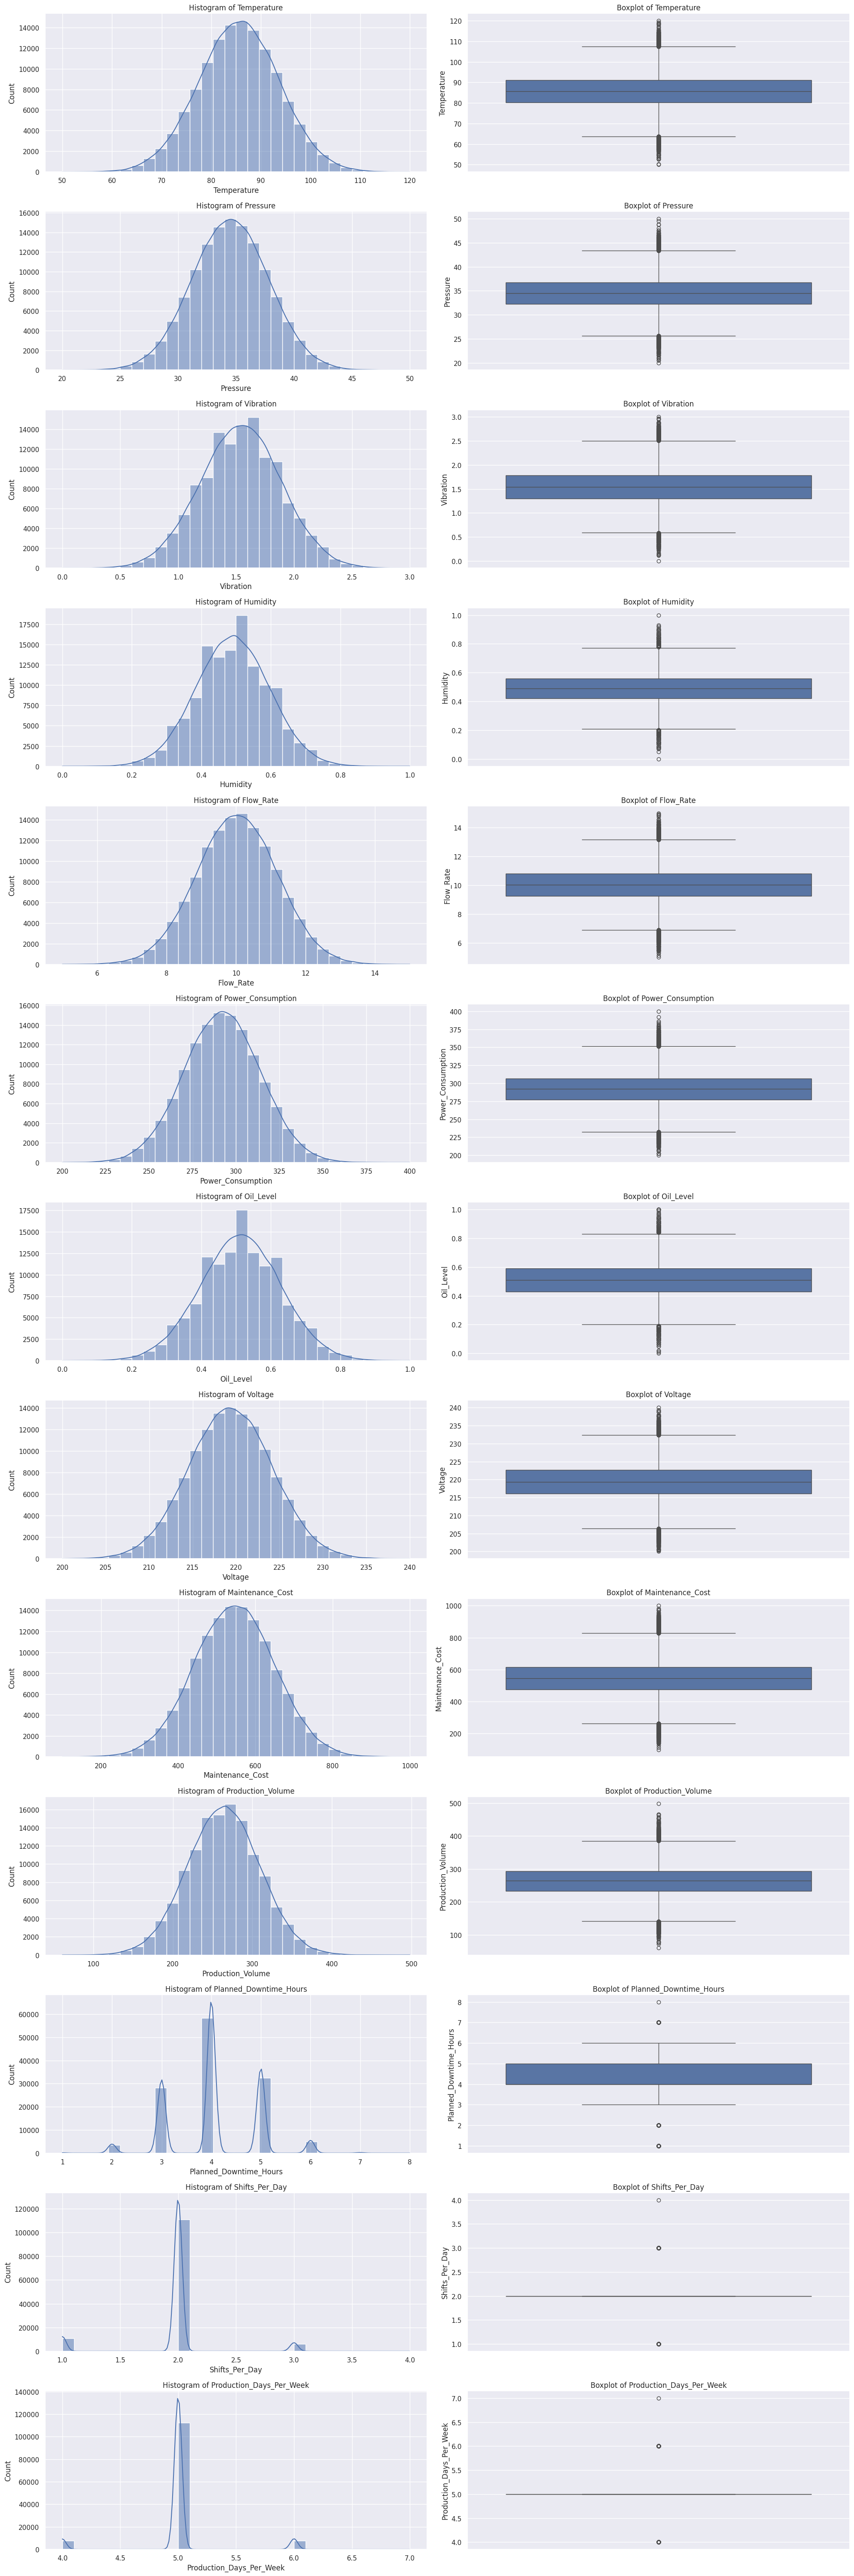

In [ ]:

# select all numerical columns without Equipment_id
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Equipment_ID']).columns

# definition du style de graphique
sns.set(style="darkgrid")
#nombre de colonnes
n_plots = len(numerical_columns)

#creation de la figure et d'un tableau d'axes
fig, ax = plt.subplots(n_plots, 2, figsize=(20, 60))

# boucle pour obtenir l'index et le nom de la colonne
for i, col in enumerate(numerical_columns):
  # creation d'un histogramme pour chaque colone numerique actuelle
  sns.histplot(df[col], ax=ax[i][0], bins=30, kde=True)
  # titre de l'histogramme
  ax[i][0].set_title(f"Histogram of {col}")

  #Cette ligne crée un boxplot pour la colonne numérique actuelle col
  sns.boxplot(df[col], ax=ax[i][1])
  ax[i][1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show(); plt.close('all')

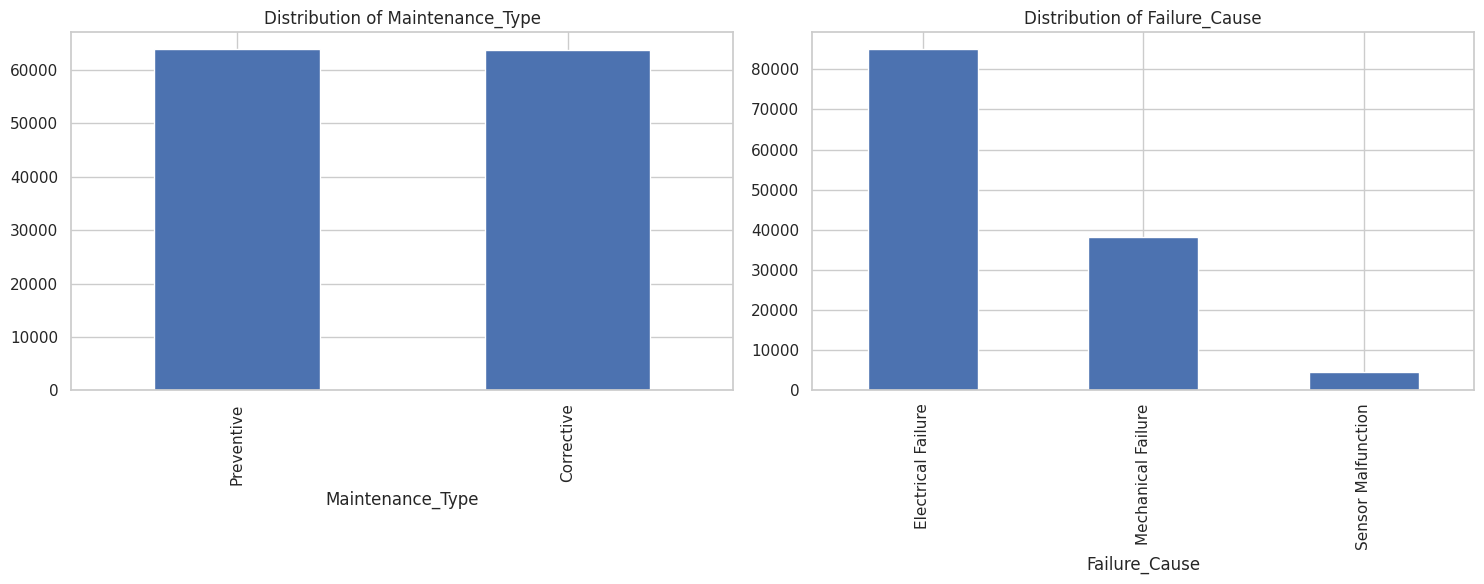

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2 , figsize=(15, 6))

for col, ax in zip(categorical_columns, axs.flat):
  df[col].value_counts().plot(kind='bar', ax=ax)
  ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show(); plt.close('all')

**4.2 Bivariate Analysis**

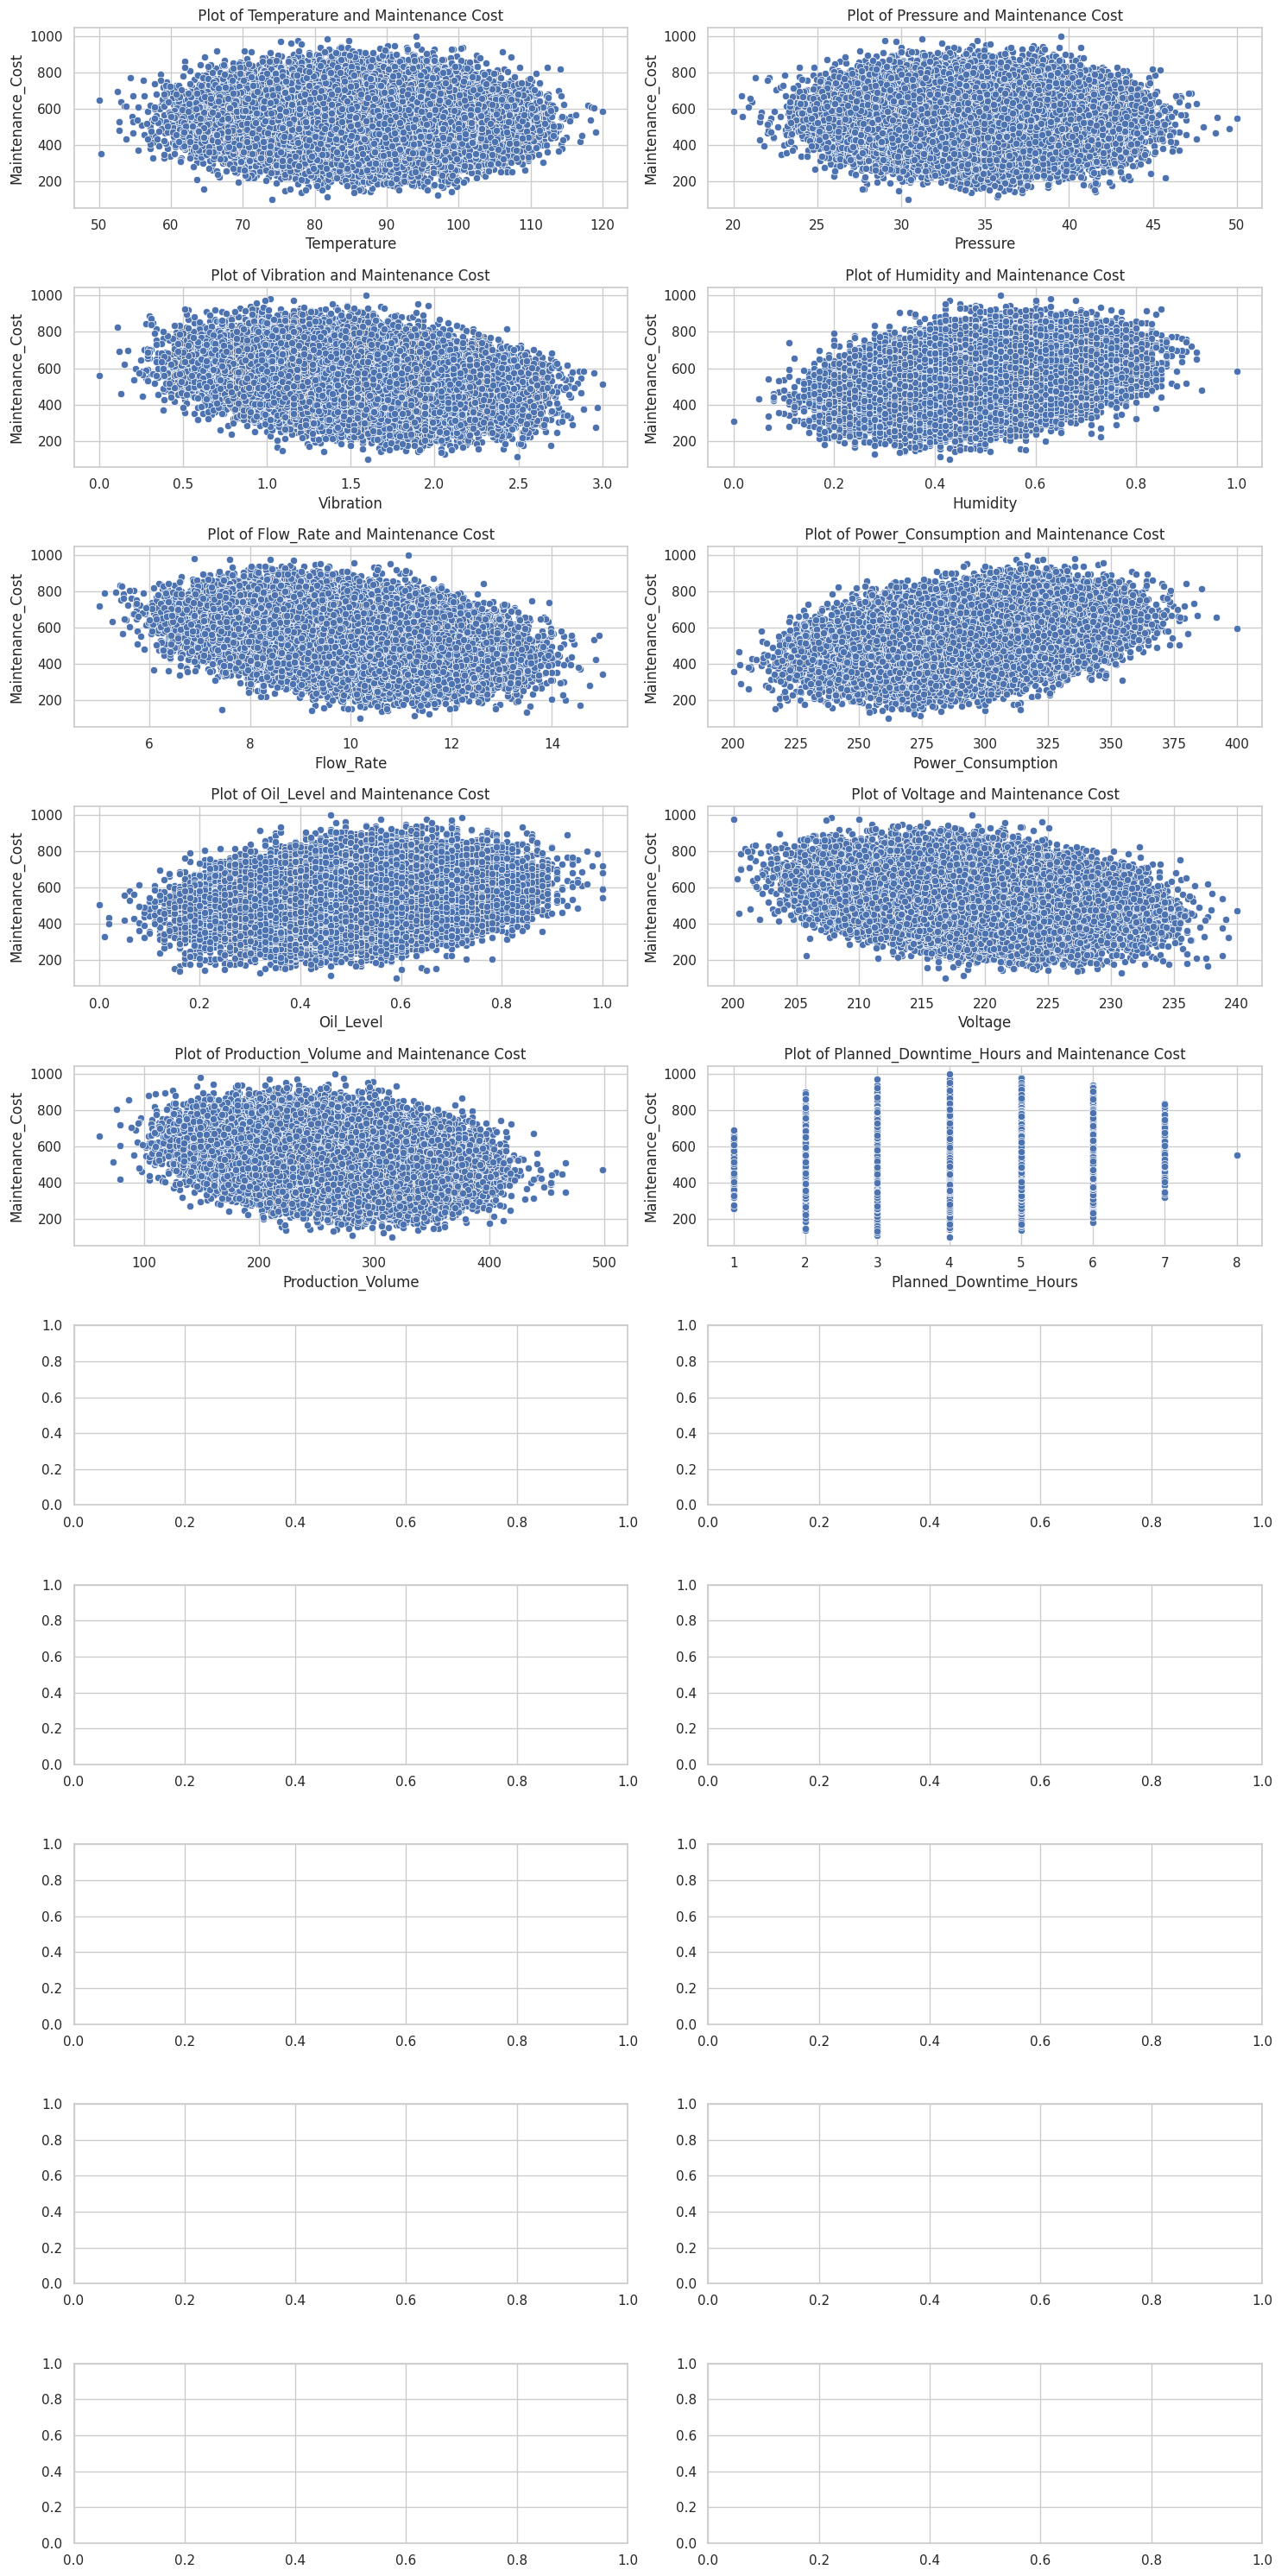

In [ ]:
sns.set(style="whitegrid")

# caracteristiques numeriques a analyser
numerical_features = ['Temperature', 'Pressure', 'Vibration', 'Humidity',
       'Flow_Rate', 'Power_Consumption', 'Oil_Level', 'Voltage', 'Production_Volume', 'Planned_Downtime_Hours']

#Cette ligne crée une figure et un tableau d'axes pour les sous-graphiques
fig, axes = plt.subplots(10, 2, figsize=(15, 30))

#Cette ligne aplatit le tableau d'axes en un tableau unidimensionnel, ce qui facilite l'itération sur les sous-graphiques
axes = axes.flatten()

#Cette ligne démarre une boucle qui itère sur chaque caractéristique numérique dans numerical_features
for i, feature in enumerate(numerical_features):

  #Cette ligne crée un nuage de points pour la caractéristique numérique actuelle feature par rapport au coût de maintenance.
  sns.scatterplot(x=feature, y= "Maintenance_Cost", data=df,  ax=axes[i])
  axes[i].set_title(f" Plot of {feature} and Maintenance Cost ")

plt.tight_layout()
plt.show(); plt.close('all')

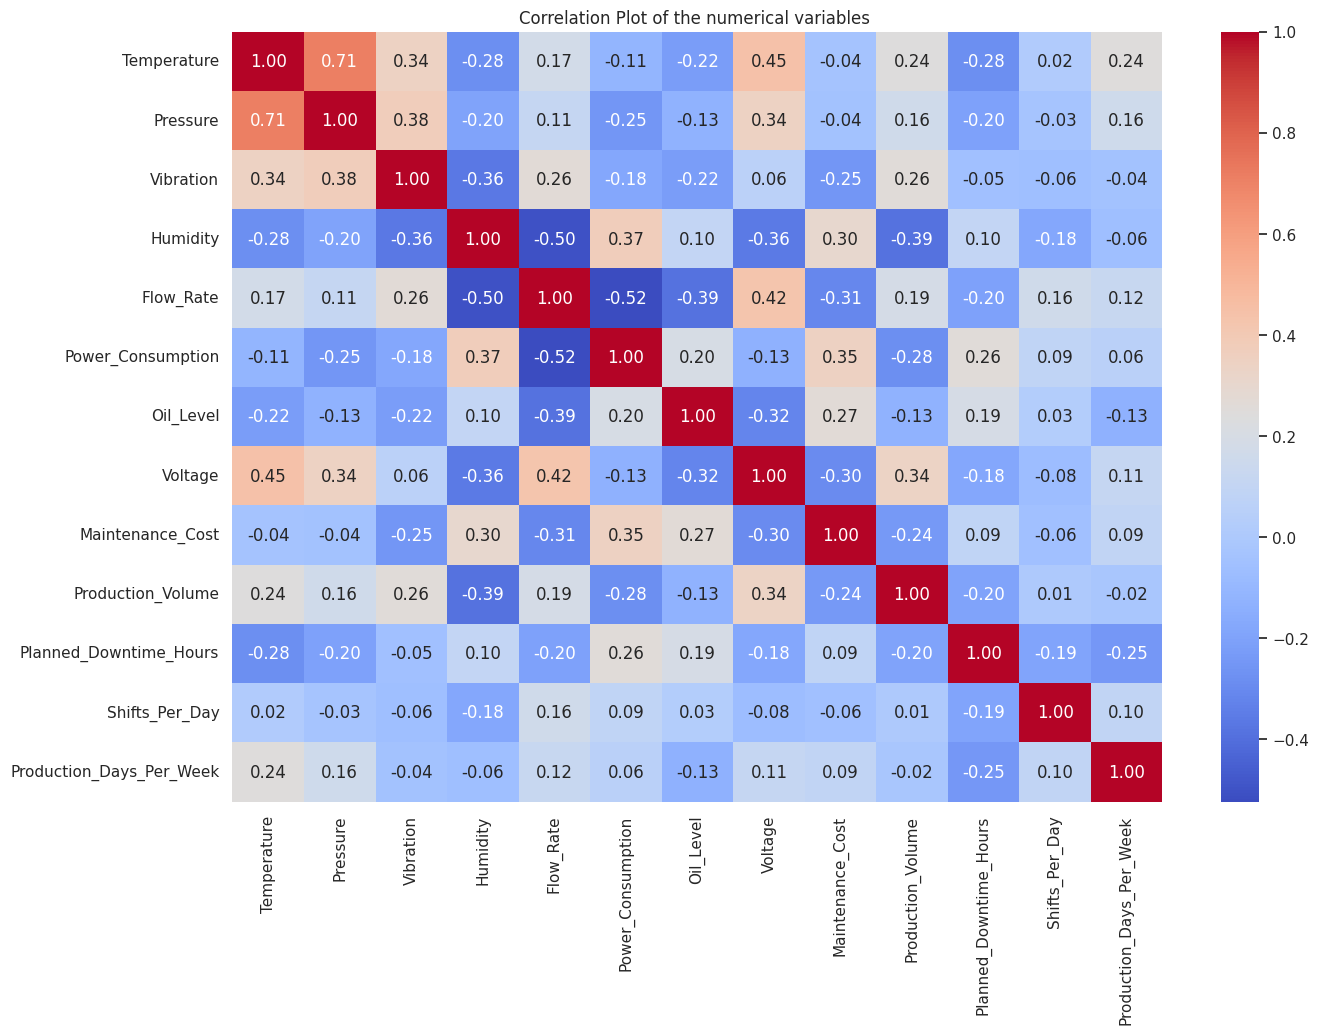

In [ ]:
# Correlation plot
correlation = df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot of the numerical variables ')
plt.show();plt.close('all')


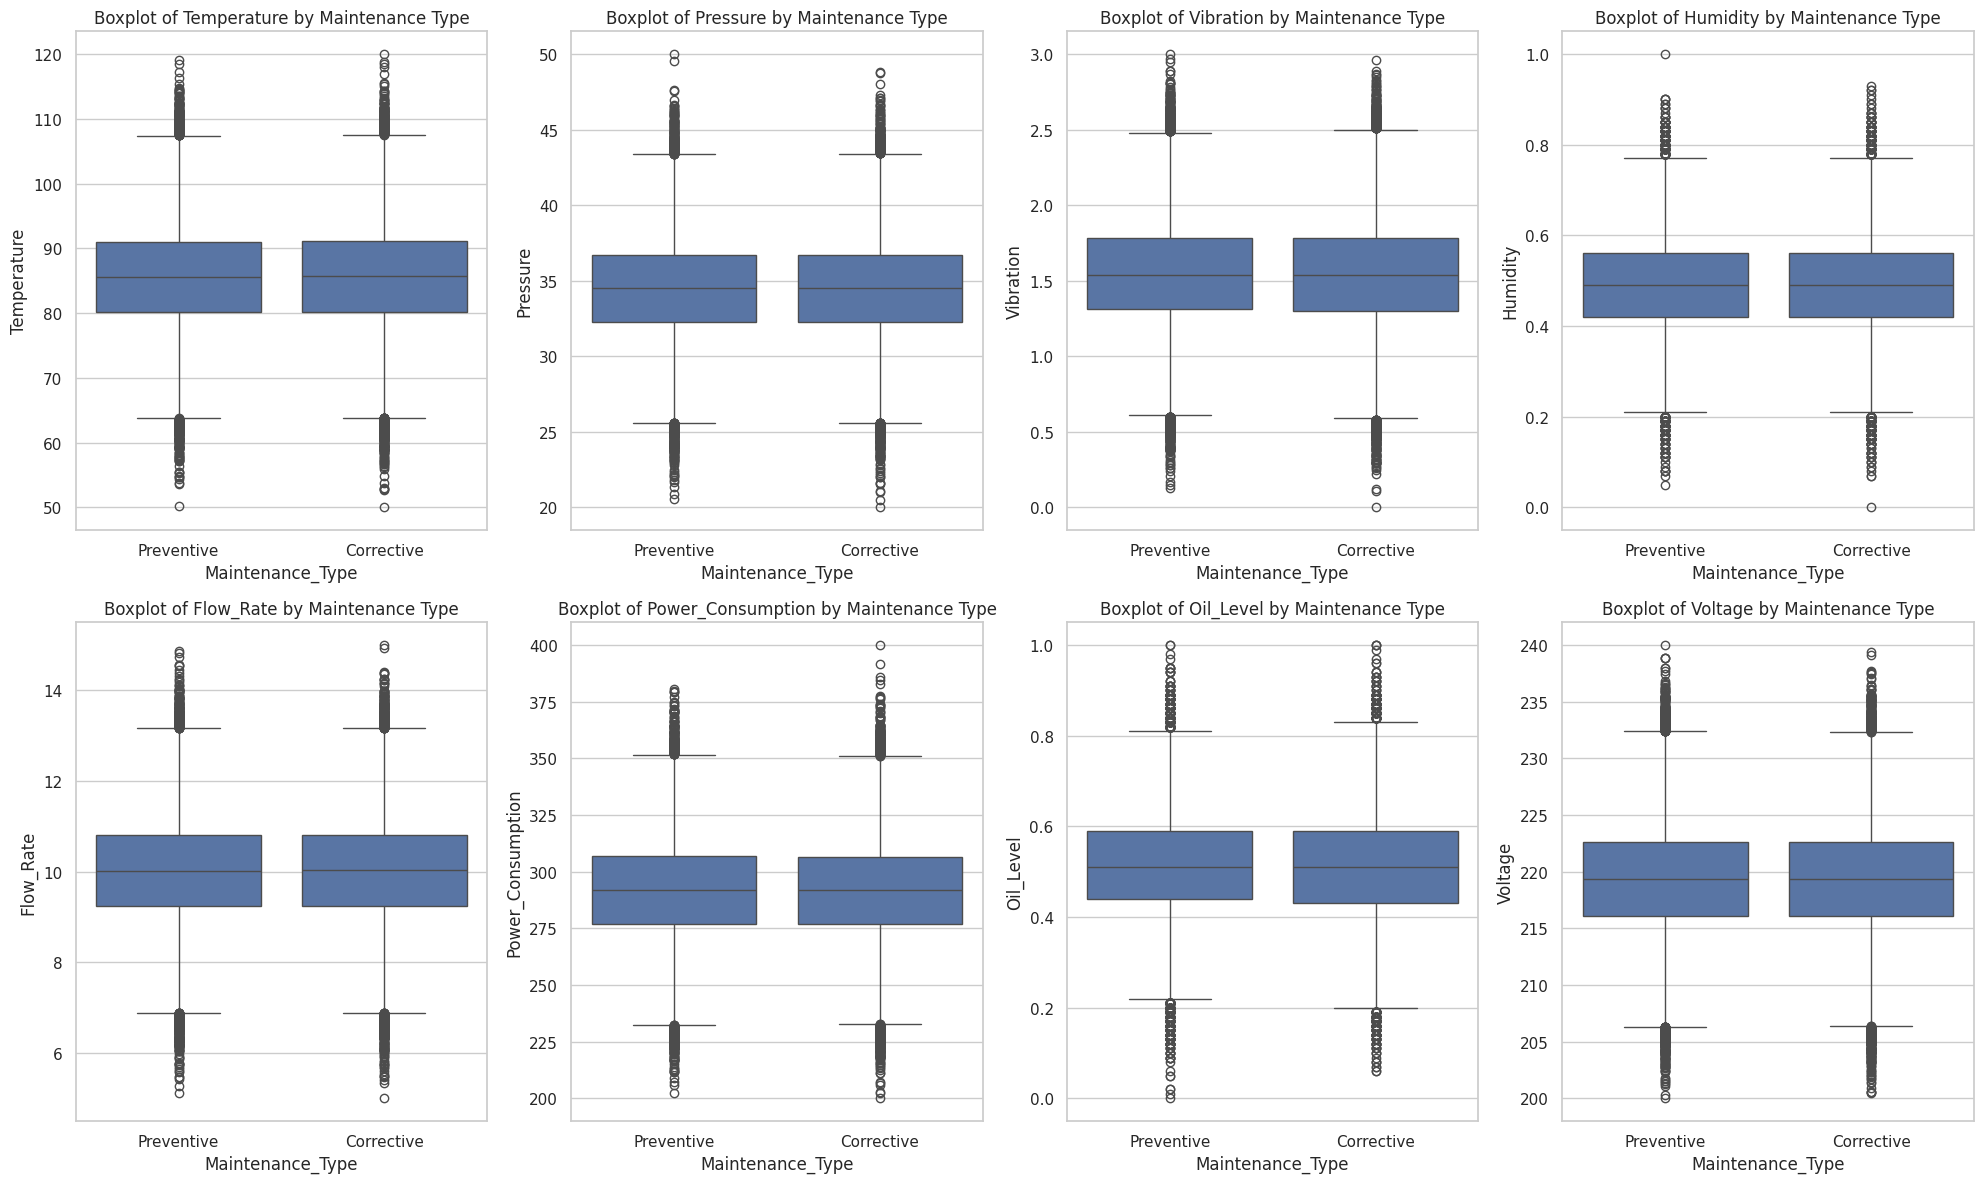

In [ ]:
# les caracteristiques sensibles au type de mait=ntenance
sensor_columns = ['Temperature', 'Pressure', 'Vibration', 'Humidity', 'Flow_Rate', 'Power_Consumption', 'Oil_Level', 'Voltage']

plt.figure(figsize=(20, 12))

for i, sensor in enumerate(sensor_columns, 1):
  plt.subplot(2, 4, i)
  sns.boxplot(x=df['Maintenance_Type'], y=sensor, data=df)
  plt.title(f'Boxplot of {sensor} by Maintenance Type')

plt.tight_layout()
plt.show(); plt.close('all')

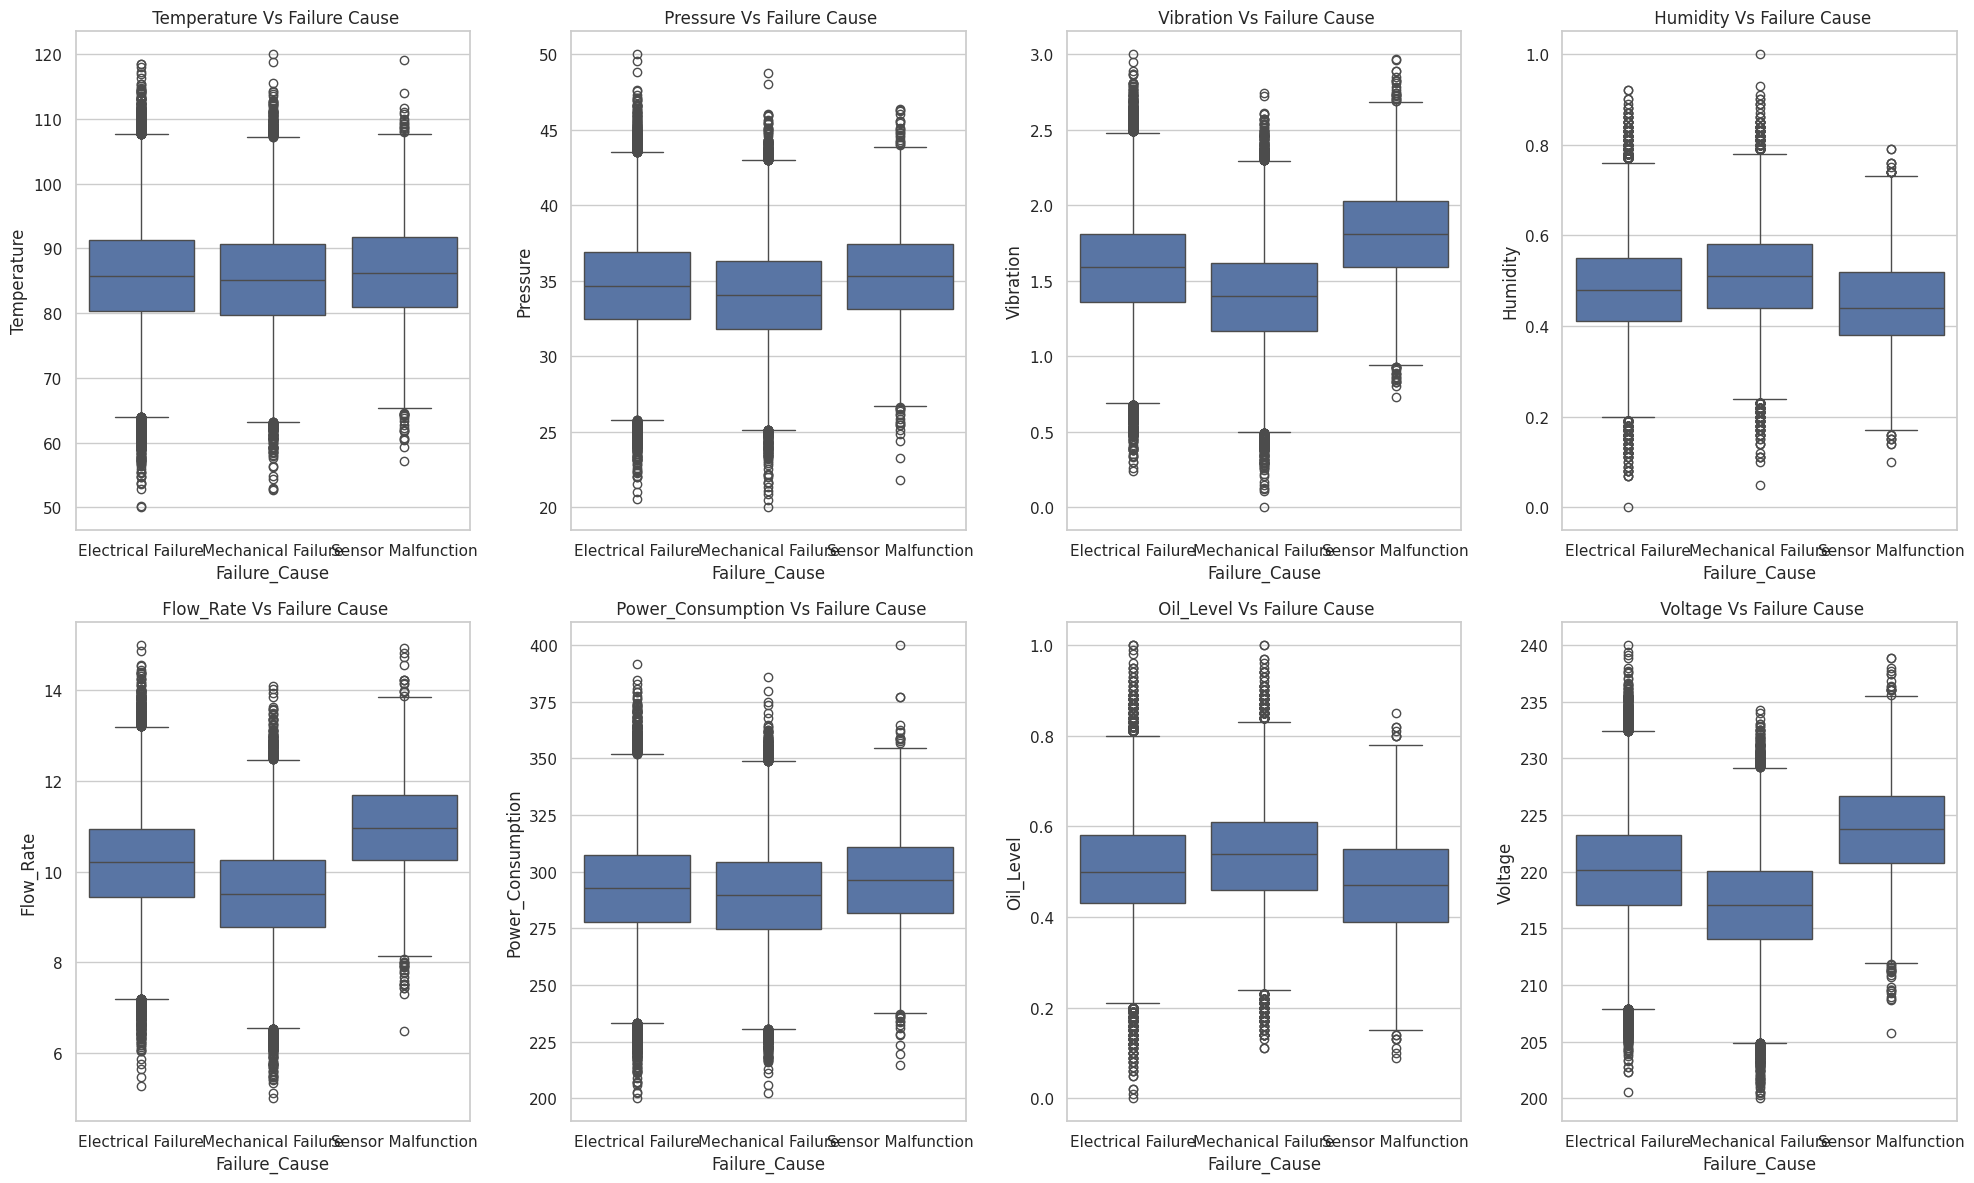

In [ ]:
 #les caracteristiques sensibles vs cause de mait=ntenance

plt.figure(figsize=(20, 12))

for i, sensor in enumerate(sensor_columns, 1):
  plt.subplot(2, 4, i)
  sns.boxplot(x=df['Failure_Cause'], y=sensor, data=df)
  plt.title(f' {sensor} Vs Failure Cause')

plt.tight_layout()
plt.show(); plt.close('all')

**5. Feature Engineering**

In [ ]:
#Maintenance Cost dataset

#suppresion des colonnes non pertinente pour la predicition
mc_df = df.drop(columns = ["Installation_Date", 'Failure_Date', 'Maintenance_Date'])

#convertion des variables catégorielles en une représentation numérique  en utilisant la technique "one-hot encoding"
mc_df = pd.get_dummies(mc_df)

#variables independantes
mc_X = mc_df.drop(columns = ["Maintenance_Cost"])

#variable dépendante ou cible
mc_y = mc_df["Maintenance_Cost"]

# creation d'un dictionnaire vide
mc_data = dict()

#diviser vos données en ensembles d'entraînement et de test.
mc_data['X_train'], mc_data['X_test'], mc_data['y_train'], mc_data['y_test'] = train_test_split(mc_X, mc_y, test_size=0.2, random_state=42)

#Cette ligne stocke les noms des colonnes de mc_X dans la clé 'columns' du dictionnaire mc_data
mc_data['columns'] = mc_X.columns

In [ ]:
# instanciation du model StandardScaler() pour une mise a l'elle  de donnees
scaler = StandardScaler()

# Ajuster(calcule la moyenne et l'écart type de chaque caractéristique de nos données d'entraînement)
# et transformer  les donnees d'entrainement(Il standardise ensuite les données d'entraînement en soustrayant la moyenne et en divisant par l'écart type pour chaque caractéristique. Cela donne à chaque caractéristique une moyenne de 0 et un écart type de 1)
mc_data['X_train'] = scaler.fit_transform(mc_data['X_train'])

# Appliquer la transformation sur les données de test
mc_data['X_test'] = scaler.transform(mc_data['X_test'])

In [ ]:
# Days till Failure dataset

# copie de notre jeu de donnees
dtf_df = df.copy()

# Convert date columns to datetime objects if they aren't already
dtf_df['Installation_Date'] = pd.to_datetime(dtf_df['Installation_Date'])
dtf_df['Failure_Date'] = pd.to_datetime(dtf_df['Failure_Date'])

# Calculate the difference in days
# Cette ligne calcule la différence entre la date de panne et la date d'installation, puis convertit cette différence en nombre de jours.
dtf_df['Days_Till_Failure'] = pd.to_timedelta(dtf_df['Failure_Date'] - dtf_df['Installation_Date']).dt.days

#Suppression des colonnes inutiles
dtf_df = dtf_df.drop(columns=['Installation_Date', 'Failure_Date', 'Maintenance_Date'])

#convertion des variables catégorielles en une représentation   en utilisant la technique "one-hot encoding"
dtf_df = pd.get_dummies(dtf_df)

#variables prédictives
dtf_X = dtf_df.drop(columns=['Days_Till_Failure'])

#variable cible(le nombre de jours avant la panne)
dtf_y = dtf_df['Days_Till_Failure']

# Un dictionnaire vide nommé dtf_data est créé pour stocker les données préparées.
dtf_data = dict()

#Division des données en ensembles d'entraînement et de test
dtf_data['X_train'], dtf_data['X_test'], dtf_data['y_train'], dtf_data['y_test'] = train_test_split(dtf_X, dtf_y, test_size=0.2, random_state=42)

#Les noms des colonnes des variables prédictives sont stockés dans le dictionnaire sous la clé 'columns'.
dtf_data['columns'] = dtf_X.columns


In [ ]:
scaler = StandardScaler()

dtf_data['X_train'] = scaler.fit_transform(dtf_data['X_train'])
dtf_data['X_test'] = scaler.transform(dtf_data['X_test'])

**6. Predicting Maintenance Cost**

In [ ]:
# creation d'un model d'arbre de decision  avec une profondeur maximale de 5 pour eviter le surapprentissage
mc_model = DecisionTreeRegressor(max_depth=5)

# entrainement du model sur les donnees d'entrainement
mc_model.fit(mc_data['X_train'], mc_data['y_train'])

# utilisation du model entrainer pour prédire les coûts de maintenance sur les données de test
y_pred = mc_model.predict(mc_data['X_test'])

### EVALUATION DU MODEL   ############

#calculer l'erreur RMSE
mc_rmse = mean_squared_error(mc_data['y_test'], y_pred, squared=False)

#calculer l'erreur MAPE
mc_mape = mean_absolute_percentage_error(mc_data['y_test'], y_pred) * 100

#afficher les resultats
print('RMSE:', mc_rmse)
print('MAPE:', mc_mape)

RMSE: 85.97075309696554
MAPE: 13.523145825416638


**7. Predicting Days Till Failure**

In [ ]:
#
dft_model_dt = DecisionTreeRegressor()

dft_model_dt.fit(dtf_data['X_train'], dtf_data['y_train'])

y_pred = dft_model_dt.predict(dtf_data['X_test'])

### EVALUATION DU MODEL   ############

#calculer l'erreur RMSE
dtf_rmse = mean_squared_error(dtf_data['y_test'], y_pred, squared=False)
dtf_mape = mean_absolute_percentage_error(dtf_data['y_test'], y_pred) * 100

#afficher les resultats
print('RMSE:', dtf_rmse)
print('MAPE:', dtf_mape)

RMSE: 74.26966985828511
MAPE: 17.44369221933039


In [ ]:
dtf_model_xgb = XGBRegressor(n_estimators=100, max_depth=7)

dtf_model_xgb.fit(dtf_data['X_train'], dtf_data['y_train'])

y_pred = dtf_model_xgb.predict(dtf_data['X_test'])

### EVALUATION DU MODEL   ############

dtf_rmse = mean_squared_error(dtf_data['y_test'], y_pred, squared=False)
dtf_mape = mean_absolute_percentage_error(dtf_data['y_test'], y_pred) * 100

#afficher les resultats
print('RMSE:', dtf_rmse)
print('MAPE:', dtf_mape)

RMSE: 50.016577806347115
MAPE: 11.803525848628704


**8. CONCLUSION**

In [ ]:
# Création d'un DataFrame pour les importances des caractéristiques
mc_fe = pd.DataFrame({
    'Columns': mc_data['columns'],
    'Feature Importances': mc_model.feature_importances_
})


# Tri des caractéristiques par importance
mc_fe = mc_fe.sort_values(by='Feature Importances', ascending=False).reset_index(drop=True)

#Affichage des 10 caractéristiques les plus importantes
mc_fe.iloc[:10]



,Columns,Feature Importances
0,Failure_Cause_Mechanical Failure,0.452002
1,Power_Consumption,0.419408
2,Failure_Cause_Sensor Malfunction,0.098122
3,Oil_Level,0.026750
4,Pressure,0.002208
5,Humidity,0.000565
6,Flow_Rate,0.000560
7,Voltage,0.000385
8,Production_Days_Per_Week,0.000000
9,Failure_Cause_Electrical Failure,0.000000


In [60]:
dtf_fe = pd.DataFrame({
    'Columns': dtf_data['columns'],
    'Feature Importances': dft_model_dt.feature_importances_
})

dtf_fe = dtf_fe.sort_values(by='Feature Importances', ascending=False).reset_index(drop=True)

dtf_fe.iloc[:10]

,Columns,Feature Importances
0,Production_Volume,0.164717
1,Oil_Level,0.116784
2,Humidity,0.111772
3,Temperature,0.095262
4,Vibration,0.078572
5,Power_Consumption,0.075382
6,Maintenance_Cost,0.065573
7,Voltage,0.055602
8,Pressure,0.052244
9,Flow_Rate,0.051869
